# Newman 5.12 - The Stefan-Botzmann Constant

If we equate any potential frequency to a spectrum from 0 to infinity (forbidding "negative" frequencies), then each frequency adds to the total amount of energy radiated off the black body per unit area. Additionally, because the denominator contains an exponential with a large number of constant exponents, those portions can be "split" off and moved outside of the frequency dependent portion.

We also convert the limits with a change of variables to allow the computer to do the calculation.

In [10]:
def gaussxw(N,a=None,b=None,verbose=False):
    '''calculate integration points and weights for Gaussian quadrature

    ARGUMENTS:
    N - order of the Gaussian approximation 
    a - lower limit of integral, default a=None (limit = -1)
    b - upper limit of integral, default b=None (limit =  1)
    
    RETURNS
    x,w = integration points x and integration weights w such that 
          sum_i w[i]*f(x[i]) is the Nth-order
          Gaussian approximation to the integral int_{-a}^b f(x) dx
          
    USAGE EXAMPLES:
    def f1(x):
        return x*(x-1)

    N=2
    a=0
    b=1

    #return the correct weights with a single call
    xp,wp = gaussxw(N,a=a,b=b)
    
    #return the weights that may be scaled for different limits (a,b)
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    '''
    
    if verbose==True:
        print("The limits of the function are: ",a,b)
        
    # Initial approximation to roots of the Legendre polynomial
    a1 = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a1+1/(8*N*N*np.tan(a1)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    if a==None and b==None:
        #generally if you are recalculating the same integral use this method
        return x,w
    else:
        #if you are only doing a single integral, use this method.
        return 0.5*(b-a)*x + 0.5*(b+a), 0.5*(b-a)*w

In [50]:
import math
import numpy as np

#Function Definitions
def f(x):
    '''The converted integrand for the Stefan-Boltzmann constant calculation
    x: the inputted frequency
    
    thermal: the amount of thermal energy radiated off'''
    
    thermal = (x**3)/ (math.exp(x)-1)
    return thermal

def energy (T, s):
    k_b = 1.3806*10**(-23) #Botlzmann Constant
    h_bar = 1.055*10**(-34) #H-bar in J*s
    c = 3*10**8 #Speed of light
    
    return s*(k_b**4)*(T**4)/(4*(math.pi**2)*(c**2)*(h_bar**3))

# Constant and Variable Declaration
T = 273 #Temperature in Kelvin (presumed)
N = 500 #Number of points to be sampled
a = ((5**0.5)-1)/2 #Start point of integral
b = 1 #End point of integral

#Calculations
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s=0.0
for k in range(N):
    s += wp[k]*f(xp[k])
    
print(T, energy(T,s))

T = 5
print(T, energy(T,s))


T = 1000
print(T, energy(T,s))


273 7.877148914
5 8.86336195151e-07
1000 1418.13791224


I modified the code from Newman 5.9 and adapted changed the internal integrand and outside multiplier. I am unsure of how accurate the answer is, given the semi-random value chosen for T (setting to approximately 0 degrees Celsius).

### Part c

In [51]:
T = 1000
W = energy (T,s)

boltzmann = W/(T**4)
print(boltzmann)

1.41813791224e-09


The result I got here was not quite accurate (off by a magnitude of 10). This may be due to the units used in one of the constants, or the number of points specified.

# Newman 5.19 - Diffraction Gratings

### Part a
If we assume that the function must have zeroes at certain points, then we can also assume that there are discrete u's that result in these zeroes. By solving the equation for u in terms of \alpha, it is revealed that u = \pi / \alpha.

### Part b

In [31]:
import math
import cmath
from scipy import integrate
import numpy as np

#Function definitions
def q(u):
    '''Defines the transmission function
    u: the position along the grating
    '''
    
    return math.sin((math.pi/(20*10**-6))*u)**2

### Part c

C:\Users\Aleksander\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
C:\Users\Aleksander\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


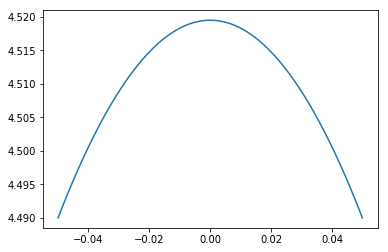

In [52]:
import matplotlib.pylab as plt
%matplotlib inline

#Function Definition
def theta (x, u):
    return 2*math.pi*x*u/((100*10**-6)*1)

# Variable and Constant Declaration
screen = 0.1 # Screen length in m
grating = 200*10**-6 # Grating width in m
slit = 20*10**-6 # Slit width
number = grating/slit # Number of slits
N = 500 #Number of runs
x = np.linspace (-screen/2, screen/2, N)
u = np.linspace (-grating/2, grating/2, number)


Pattern = []

# Function runs
for i in range (len(x)):
    Intensity = []
    for j in range (len(u)):
        Intensity.append(q(u[j])*(math.cos(theta(x[i],u[j]))+cmath.sqrt(-1)*math.sin(theta(x[i],u[j]))))
    Pattern.append(integrate.simps(Intensity))

plt.plot(x,Pattern, label = "Intensity Pattern")
plt.show()

The above appears to be the envelope of the overall equation. Unfortunately, for reasons I was unable to decipher even with cross-comparison due to the density of information, I was unable to come up with satisfactory equations and models. I recognize that the above models are flawed, and will be looking back over them to try and ascertain why they failed.